In [1]:
import os
import sys

import numpy as np
import torch

sys.path.append(os.path.join(os.path.dirname("__file__"), ".."))

## Dataset

In [2]:
from modules.data import get_data

dataset = get_data("Cora") # no attack get_data("Cora", "n:10")
dataset

Cora()

## Training

In [3]:
from models.gat import GIBGAT
from models.gcn import GIBGCN

from modules.train import train_node_level

def print_results(result_dict):
    if "train" in result_dict:
        print("Train accuracy: %4.2f%%" % (100.0 * result_dict["train"]))
    if "val" in result_dict:
        print("Val accuracy:   %4.2f%%" % (100.0 * result_dict["val"]))
    print("Test accuracy:  %4.2f%%" % (100.0 * result_dict["test"]))
    
class Config(dict):
    def __init__(self, *args, **kwargs):
        super(Config, self).__init__(*args, **kwargs)
        self.__dict__ = self

### GCN

In [4]:
conf_GIBGCN = Config(
    exp_name="GIBGCN_CORA",
    model=GIBGCN(dataset.num_features, dataset.num_classes, latent_size=8),
    model_name="GIB-GCN",
    dataset_name="Cora",
    lr=0.03,
    weight_decay=5e-4,
    beta1=0.001,
    beta2=0.01,
    CHECKPOINT_PATH="../saved_models",
    device=torch.device("cuda" if torch.cuda.is_available() else "cpu"),
    loss_type=dataset.loss,
)
conf_GIBGCN

{'exp_name': 'GIBGCN_CORA',
 'model': GIBGCN(
   (conv1): GCNConv(1433, 8)
   (conv2): GCNConv(8, 7)
 ),
 'model_name': 'GIB-GCN',
 'dataset_name': 'Cora',
 'lr': 0.03,
 'weight_decay': 0.0005,
 'beta1': 0.001,
 'beta2': 0.01,
 'CHECKPOINT_PATH': '../saved_models',
 'device': device(type='cuda'),
 'loss_type': 'softmax'}

In [5]:
trainer, train_out_dict, val_out_dict, pl_model, result, test_result = train_node_level(
    conf_GIBGCN,
    dataset,
)

print_results(result)

Global seed set to 42
wandb: Currently logged in as: stepp1. Use `wandb login --relogin` to force relogin


/home/step/.miniconda3/envs/gib/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/callback_connector.py:96: LightningDeprecationWarning: Setting `Trainer(progress_bar_refresh_rate=1)` is deprecated in v1.5 and will be removed in v1.7. Please pass `pytorch_lightning.callbacks.progress.TQDMProgressBar` with `refresh_rate` directly to the Trainer's `callbacks` argument instead. Or, to disable the progress bar pass `enable_progress_bar = False` to the Trainer.
  rank_zero_deprecation(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Global seed set to 42
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type   | Params
---------------------------------
0 | model | GIBGCN | 23.1 K
---------------------------------
23.1 K    Trainable params
0         Non-trainable params
23.1 K    Total params
0.092     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/home/step/.miniconda3/envs/gib/lib/python3.9/site-packages/pytorch_lightning/utilities/data.py:72: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2708. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
  warning_cache.warn(
/home/step/.miniconda3/envs/gib/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1933: PossibleUserWarning: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

Train accuracy: 98.57%
Val accuracy:   80.00%
Test accuracy:  80.80%


/tmp/ipykernel_1523829/1902888305.py:17: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  plot_tsne(F.softmax(val_out_dict["latent_out"][1]).detach(), y_colors, f_suffix=conf_GIBGCN.model_name, pca=False)
/home/step/.miniconda3/envs/gib/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/step/.miniconda3/envs/gib/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/home/step/.miniconda3/envs/gib/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

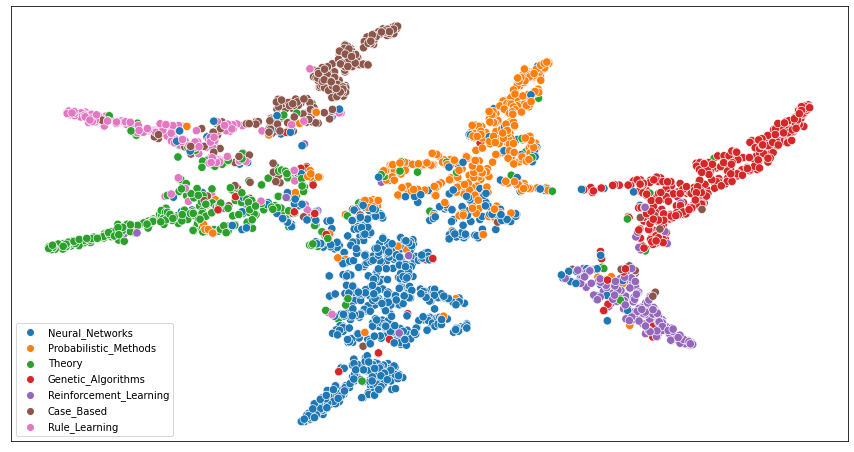

In [6]:
from visualization import *
from torch.nn import functional as F

class_mapping = {
    0: "Theory",
    1:"Reinforcement_Learning",
    2:"Genetic_Algorithms",
    3:"Neural_Networks" ,
    4:"Probabilistic_Methods",
    5:"Case_Based" ,
    6:"Rule_Learning"
}

y_colors = [f"{class_mapping[item]}" for item in dataset[0].y.tolist()]


plot_tsne(F.softmax(val_out_dict["latent_out"][1]).detach(), y_colors, f_suffix=conf_GIBGCN.model_name, pca=False)

Aug 01 12:47:42 AM: Computing 13-nearest neighbors, with max_distance=None
Aug 01 12:47:45 AM: Exact nearest neighbors by brute force 
Aug 01 12:47:46 AM: Your dataset appears to contain duplicated items (rows); when embedding, you should typically have unique items.
Aug 01 12:47:46 AM: The following items have duplicates [  31   70   92   97  144  184  187  208  222  240  247  276  287  375
  378  380  390  420  431  477  538  545  574  587  662  663  692  709
  713  780  806  832  947  953  959  967  974  995  997  999 1005 1024
 1029 1034 1040 1048 1056 1127 1128 1170 1180 1181 1223 1231 1233 1236
 1260 1263 1291 1298 1342 1356 1375 1393 1431 1445 1476 1495 1499 1500
 1600 1646 1648 1691 1706 1720 1753 1783 1811 1863 1995 2076 2102 2103
 2205 2251 2255 2260 2348 2410 2429 2431 2437 2458 2461 2544 2569 2603
 2619 2631 2633 2639 2660 2664 2665 2675 2676 2690 2691 2692 2694 2697]
Aug 01 12:47:46 AM: Computing quadratic initialization.


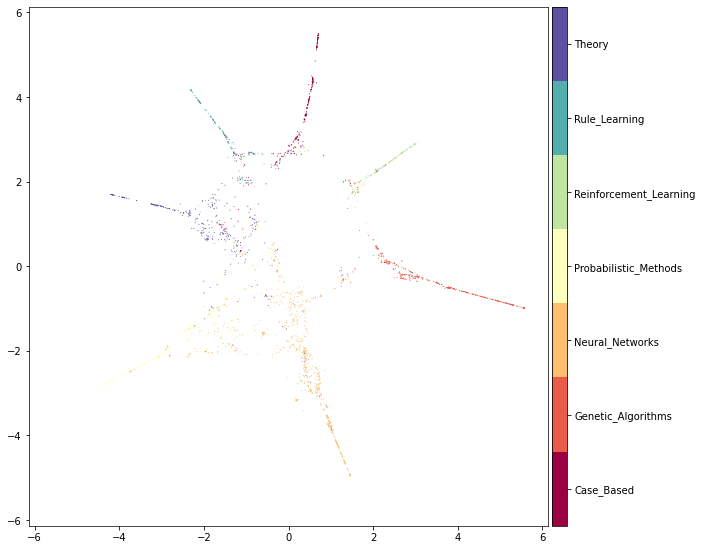

In [7]:
import pymde
embedding = pymde.preserve_neighbors(F.softmax(val_out_dict["latent_out"][1], 1).detach(), verbose=True).embed()
axs = pymde.plot(embedding, color_by=y_colors)

Aug 01 12:47:48 AM: Computing 3665278 distances


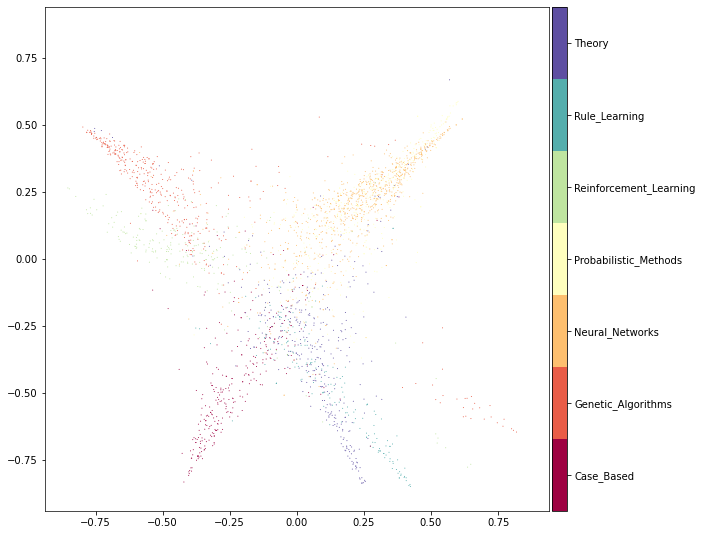

In [8]:
embedding = pymde.preserve_distances(F.softmax(val_out_dict["latent_out"][1], 1).detach(), verbose=True).embed()
axs = pymde.plot(embedding, color_by=y_colors)

In [9]:
for y_val in dataset[0].y.unique():
    print(y_val, sum(dataset[0].y == y_val))

tensor(0) tensor(351)
tensor(1) tensor(217)
tensor(2) tensor(418)
tensor(3) tensor(818)
tensor(4) tensor(426)
tensor(5) tensor(298)
tensor(6) tensor(180)
